<a href="https://colab.research.google.com/github/matheusmottadf/mvp_II/blob/main/Parte_A_MVP_Sprint_II_Matheus_Motta_Dias_Ferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MPV Sprint II - Machine Learning - Problema de Classificação

 ## **Objetivo e premissa**

Selecionei um conjunto de dados de uma campanha de marketing executada através de ligações telefônicas feitas por representantes um banco português. O objetivo de campanha é atrair cliente para realização de investimentos na modalidade de prazo fixo (term deposit).

O objetivo desse trabalho é tentar prever se o cliente vai ou não fazer o investimento baseado no seu perfil, dessa maneira, numa próxima campanha, o banco poderia economizar esforços e recursos ao focar sua campanha em um demográfico específico.

  ## **Composição do Dataset**
   # Dados Bancários do cliente:
   1 - age (numeric)

   2 - job : tipo de emprego (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

   3 - marital : Status civil (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

   4 - Educação (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

   5 - default: possui pendências de crédito? (categorical: 'no','yes','unknown')

   6 - housing: tem imóvel financiado? (categorical: 'no','yes','unknown')

   7 - loan: tem imprestimo pessoal? (categorical: 'no','yes','unknown')

   # Relativo ao último contato dessa camapanha:

   8 - contact: Canal de comunicação (categorical: 'cellular','telephone')

   9 - month: mês de último contato (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

  10 - day_of_week: último dia da semana do contato (categorical: 'mon','tue','wed','thu','fri')

  11 - duration: duração do último contato, em segundos (numeric). É importante salientar que esse atributo tem alto impacto no target, se a duração da chamada for igual a 0, por razões obvías,  o valor predito de y será 0. Tendo isso em mente, esse atributo será mantido apenas para fins acadêmicos, mas deve ser levado em conta que para cenários do "mundo real" esse atributo deve ser descartado do dataset.

   # Outros atributos:

  12 - campaign: número de contatos feitos com esse cliente durante o período da campanha  (numeric, includes last contact)

  13 - pdays: número de dias depois que o cliente foi contatado desde a última campanha  (numeric; 999 means client was not previously contacted)

  14 - previous: número de contatos feitos para esse cliente ANTES dessa campanha (numeric)

  15 - poutcome: resultado da última campanha feita com esse cliente (categorical: 'failure','nonexistent','success')

   # Atributos sociais e econômicos

  16 - emp.var.rate: Taxa na variação de empregabilidade - Indicador trimestral (numeric)

  17 - cons.price.idx: Índice de preços no consumidor - Indicador mensal (numeric)   

  18 - cons.conf.idx: Índice de confiança do consumidor - Indicador mensal
  (numeric)

  19 - euribor3m: euribor (taxa de juros média dos empréstimos interbancários sem garantia da Zona Euro) - Indicador diário (numeric)

  20 - nr.employed: number of employees - Indicador trimestral (numeric)

  # Target (y)

  21 target - 0 = não fez o investimento, 1 = fez o investimento (numeric)  


## Importanto as bibliotecas

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários -
# Considerando que o conjunto de dados a ser trabalho contém dados categóricos nominais, além das bibliotecas "pandas", "numpy", "sklearn"
# importaremos também a biblioteca category_encoders para realização de One-hot encoding
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from category_encoders.one_hot import OneHotEncoder


## Importando dataset, análise e tratamento de dados com One-hot encoding

In [ ]:
# Importando o dataset do meu diretório GitHub usando ";" como delimitador do CSV
url = "https://raw.githubusercontent.com/matheusmottadf/mvp_II/main/bank_full.csv"
dataset = pd.read_csv(url, delimiter=";")





In [ ]:
# Renomeando nome da coluna 'y' para 'target'
dataset.rename(columns={'y': 'target'}, inplace=True)

In [ ]:
# Visualizando cabeçalho do dataset para verificar se foi importado corretamente
dataset.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Visualizando formato do dataset para parametrização
dataset.shape

(45211, 17)

In [ ]:
# Analisando tipo de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


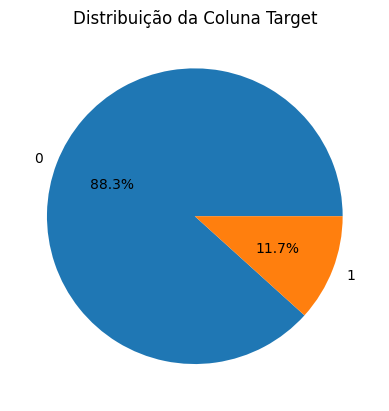

In [ ]:
# Contar a ocorrência de valores 'no' e 'yes' na coluna 'target'
# Dados de exemplo
labels = dataset['target'].unique()  # Obter os rótulos únicos da coluna 'target'
sizes = dataset['target'].value_counts()  # Contar a ocorrência de cada valor na coluna 'target'

# Plotar o gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Adicionar título ao gráfico
plt.title('Distribuição da Coluna Target')

# Exibir o gráfico
plt.show()


In [ ]:
# Selecionando dados com classe de "objeto"
dataset.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [ ]:
# Selecionando dados com classe de "objeto" e vendo suas suas ocorrências e como estão distribuidos
dataset.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [ ]:
# Declarando variável com objetos categóricos nominais e numéricos

dataset_cats = dataset.select_dtypes(include='object')
dataset_int = dataset.select_dtypes(include='int64')

In [ ]:
# Mostrando dataset com nominais
dataset_cats

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [ ]:
# Mostrando dataset com numéricos
dataset_int

,age,balance,day,duration,campaign,pdays,previous,target
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


In [ ]:
# Declarando variáveis para análise de atributos
array_dados_num = dataset_int.values

X_num = array_dados_num [:,0:7] # atributos
y_num = array_dados_num [:,7] # target

In [ ]:
# Seleção de atributos numéricos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit_num = best_var.fit(X_num, y_num)

# Reduz X para os atributos selecionados
features = fit_num.transform(X_num)

# Resultados
print('\nNúmero original de atributos:', X_num.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset_int.columns[0:7])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit_num.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_int.columns[0:7]))


Número original de atributos: 7

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Scores dos Atributos Originais: [  28.625  126.572   36.359 8333.761  243.358  490.697  396.444]

Atributos Selecionados: ['duration' 'campaign' 'pdays' 'previous']


In [ ]:
# Importância de Atributos numéricos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X_num,y_num)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset_int.columns[0:7])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
[0.154 0.183 0.127 0.344 0.064 0.088 0.041]


In [ ]:
# Transformando as colunas com One-hot encoding e mantendo o nome das colunas utlizando a função "use_cat_names"
one_hot_enc = OneHotEncoder(cols=['job','marital','education','default','housing','loan','contact','month','poutcome'], use_cat_names=True)

In [ ]:
# Visualizando colunas depois de encodar
one_hot_enc.fit_transform(dataset_cats)


,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,...,month_dec,month_jan,month_feb,month_mar,month_apr,month_sep,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Criando dataframe com One-hot Encoder
dataset_encoded = one_hot_enc.fit_transform(dataset_cats)



In [ ]:
# Visualizando Dataframe tratado

dataset_encoded

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,...,month_dec,month_jan,month_feb,month_mar,month_apr,month_sep,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Visualizando atributos dos dataset
dataset_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_management       45211 non-null  int64
 1   job_technician       45211 non-null  int64
 2   job_entrepreneur     45211 non-null  int64
 3   job_blue-collar      45211 non-null  int64
 4   job_unknown          45211 non-null  int64
 5   job_retired          45211 non-null  int64
 6   job_admin.           45211 non-null  int64
 7   job_services         45211 non-null  int64
 8   job_self-employed    45211 non-null  int64
 9   job_unemployed       45211 non-null  int64
 10  job_housemaid        45211 non-null  int64
 11  job_student          45211 non-null  int64
 12  marital_married      45211 non-null  int64
 13  marital_single       45211 non-null  int64
 14  marital_divorced     45211 non-null  int64
 15  education_tertiary   45211 non-null  int64
 16  education_secondary  4

In [ ]:
# Concatenando os dois dataframes
dataset_ohe = pd.concat([dataset_encoded, dataset_int], axis=1)


In [ ]:
# Visualizando dataframe final
dataset_ohe

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,...,poutcome_other,poutcome_success,age,balance,day,duration,campaign,pdays,previous,target
0,1,0,0,0,0,0,0,0,0,0,...,0,0,58,2143,5,261,1,-1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,44,29,5,151,1,-1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,33,2,5,76,1,-1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,47,1506,5,92,1,-1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,1,0,0,0,0,0,0,0,0,...,0,0,51,825,17,977,3,-1,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,71,1729,17,456,2,-1,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,1,72,5715,17,1127,5,184,3,1
45209,0,0,0,1,0,0,0,0,0,0,...,0,0,57,668,17,508,4,-1,0,0


## Preparação do holdout

In [ ]:
# Preparando o holdout utilizando o dataframe com OHE
array = dataset_ohe.values
X = array[:,0:51] # atributos
y = array[:,51] # target
# Divisão do holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
# Folds para cross validation
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=9)

## Treinando modelos e testando acurácia




LR-orig: 0.895 (0.003)
KNN-orig: 0.884 (0.006)
CART-orig: 0.876 (0.003)
NB-orig: 0.849 (0.006)
SVM-orig: 0.884 (0.003)
Bag-orig: 0.906 (0.004)
RF-orig: 0.902 (0.003)
ET-orig: 0.897 (0.003)
Ada-orig: 0.903 (0.003)
GB-orig: 0.907 (0.004)
Vot-orig: 0.893 (0.003)
LR-padr: 0.903 (0.003)
KNN-padr: 0.891 (0.003)
CART-padr: 0.878 (0.004)
NB-padr: 0.849 (0.005)
SVM-padr: 0.903 (0.003)
Bag-padr: 0.906 (0.004)
RF-padr: 0.903 (0.002)
ET-padr: 0.896 (0.002)
Ada-padr: 0.903 (0.003)
GB-padr: 0.907 (0.004)
Vot-padr: 0.904 (0.004)
LR-norm: 0.902 (0.003)
KNN-norm: 0.891 (0.003)
CART-norm: 0.878 (0.003)
NB-norm: 0.849 (0.005)
SVM-norm: 0.895 (0.004)
Bag-norm: 0.906 (0.003)
RF-norm: 0.903 (0.002)
ET-norm: 0.896 (0.002)
Ada-norm: 0.903 (0.003)
GB-norm: 0.907 (0.004)
Vot-norm: 0.900 (0.003)


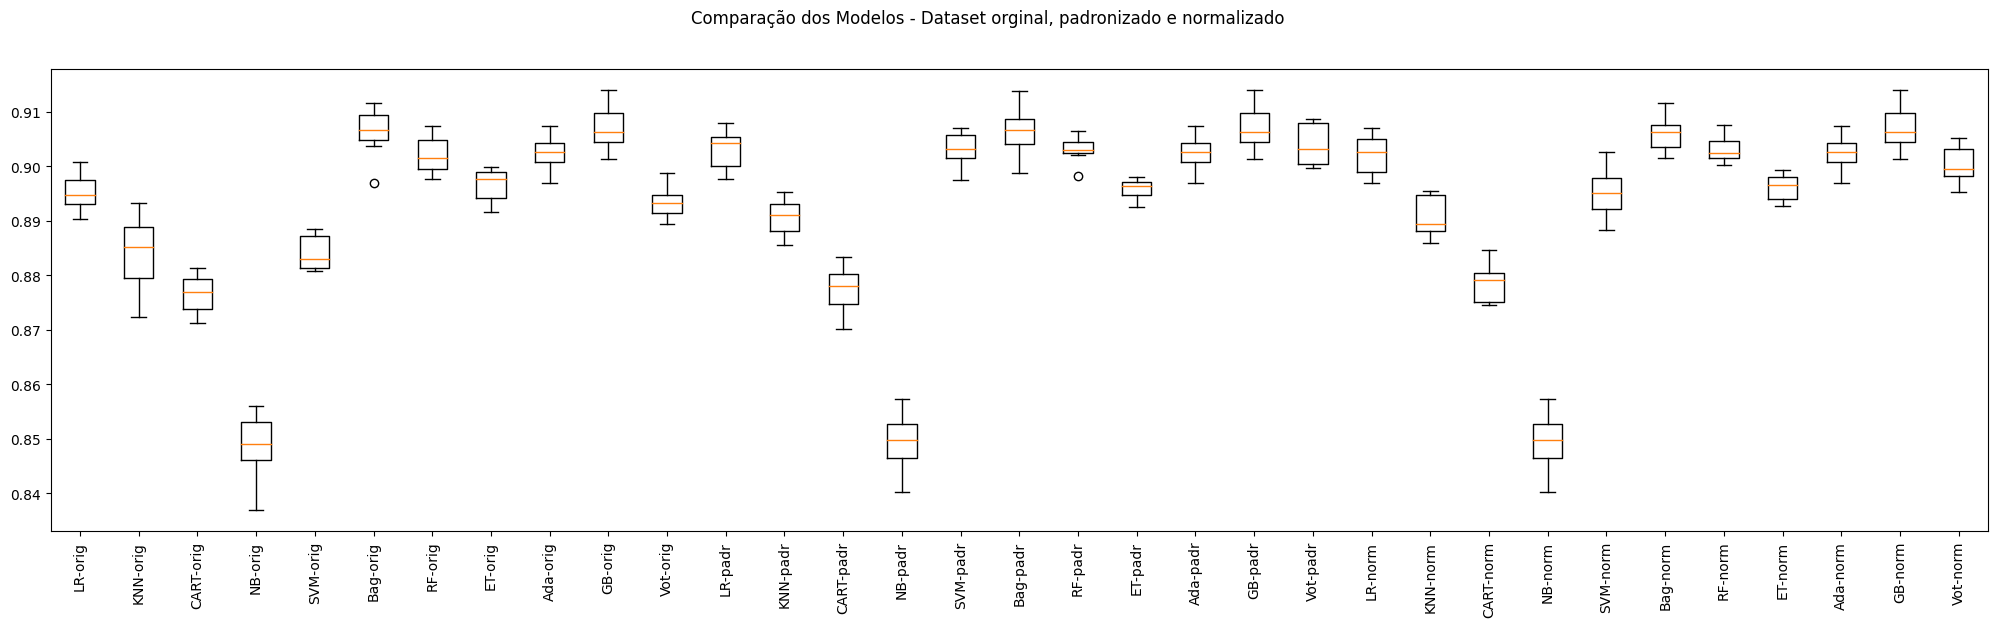

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Avaliação dos modelos
for name, model in pipelines:
    cv_results_acc = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    cv_results_prec = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'precision_macro')
    cv_results_rec = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'recall_macro')
    cv_results_f1 = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1_macro')
    cv_results_roc_auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')

    results.append(cv_results_acc)
    results.append(cv_results_prec)
    results.append(cv_results_rec)
    results.append(cv_results_f1)
    results.append(cv_results_roc_auc)

    names.append(name)

    #resultados
    msg = "%s\nAccuracy: %f (%f)\nPrecision: %f (%f)\nRecall: %f (%f)\nF1-score: %f (%f)\nROC AUC: %f (%f)\n" % (
        name, cv_results_acc.mean(), cv_results_acc.std(), cv_results_prec.mean(), cv_results_prec.std(),
        cv_results_rec.mean(), cv_results_rec.std(), cv_results_f1.mean(), cv_results_f1.std(),
        cv_results_roc_auc.mean(), cv_results_roc_auc.std())
    print(msg)

LR-orig
Accuracy: 0.895294 (0.003232)
Precision: 0.761263 (0.010245)
Recall: 0.620093 (0.009152)
F1-score: 0.654779 (0.010592)
ROC AUC: 0.876670 (0.005677)

KNN-orig
Accuracy: 0.883986 (0.006468)
Precision: 0.705150 (0.020936)
Recall: 0.619812 (0.011075)
F1-score: 0.645844 (0.014070)
ROC AUC: 0.763452 (0.012553)

CART-orig
Accuracy: 0.877903 (0.004386)
Precision: 0.702751 (0.010029)
Recall: 0.707241 (0.012340)
F1-score: 0.706388 (0.010118)
ROC AUC: 0.709338 (0.011648)

NB-orig
Accuracy: 0.848734 (0.005712)
Precision: 0.663337 (0.007972)
Recall: 0.715281 (0.013279)
F1-score: 0.682756 (0.009488)
ROC AUC: 0.817448 (0.012275)

SVM-orig
Accuracy: 0.884069 (0.003032)
Precision: 0.687218 (0.184659)
Recall: 0.501517 (0.001391)
F1-score: 0.472752 (0.002717)
ROC AUC: 0.730993 (0.014280)

Bag-orig
Accuracy: 0.905801 (0.004165)
Precision: 0.777953 (0.009403)
Recall: 0.722361 (0.007861)
F1-score: 0.744633 (0.009992)
ROC AUC: 0.924344 (0.007281)

RF-orig
Accuracy: 0.902566 (0.003277)
Precision: 0.80

In [ ]:
# Teste de acurácia
# Dados para os algoritmos
algorithms = ['LR-orig', 'KNN-orig', 'CART-orig', 'NB-orig', 'SVM-orig', 'Bag-orig', 'RF-orig', 'ET-orig', 'Ada-orig', 'GB-orig', 'Vot-orig', 'LR-padr', 'KNN-padr', 'CART-padr', 'NB-padr', 'SVM-padr', 'Bag-padr', 'RF-padr', 'ET-padr', 'Ada-padr', 'GB-padr', 'Vot-padr', 'LR-norm', 'KNN-norm', 'CART-norm', 'NB-norm', 'SVM-norm', 'Bag-norm', 'RF-norm', 'ET-norm', 'Ada-norm', 'GB-norm', 'Vot-norm']

# Métrica de interesse (Accuracy)
metric_name = 'Accuracy'

# Métricas
metrics = {
    'LR-orig': 0.895294, 'KNN-orig': 0.883986, 'CART-orig': 0.877903, 'NB-orig': 0.848734, 'SVM-orig': 0.884069,
    'Bag-orig': 0.905801, 'RF-orig': 0.902566, 'ET-orig': 0.895847, 'Ada-orig': 0.902566, 'GB-orig': 0.906990,
    'Vot-orig': 0.892806, 'LR-padr': 0.902870, 'KNN-padr': 0.890843, 'CART-padr': 0.877709, 'NB-padr': 0.849425,
    'SVM-padr': 0.903091, 'Bag-padr': 0.906934, 'RF-padr': 0.900879, 'ET-padr': 0.896843, 'Ada-padr': 0.902566,
    'GB-padr': 0.906990, 'Vot-padr': 0.904086, 'LR-norm': 0.902096, 'KNN-norm': 0.890788, 'CART-norm': 0.877018,
    'NB-norm': 0.849425, 'SVM-norm': 0.894990, 'Bag-norm': 0.905884, 'RF-norm': 0.902511, 'ET-norm': 0.896151,
    'Ada-norm': 0.902566, 'GB-norm': 0.906990, 'Vot-norm': 0.900437
}

# Encontrar o algoritmo com a maior acurácia
best_algorithm = max(metrics, key=metrics.get)


print(f'O melhor desempenho de acurácia é do algoritmo {best_algorithm}')


O melhor desempenho de acurácia é do algoritmo GB-orig


Ao analizar os resultados acima, verifiquei que o modelo Gradient Bossting original "(Gradient Boosting Classifier)" apresentou melhor acuracia tanto em relação as versões padronizadas e normalizadas, quanto em relação aos demais modelos e apresentou desvio padrão de apenas 0.004.

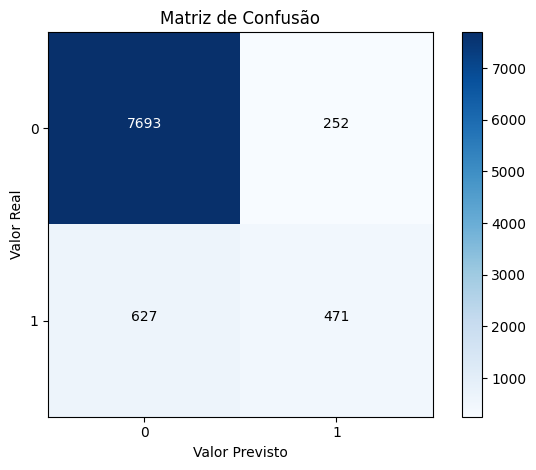

In [ ]:
# Treinando o modelo Gradient Boosting
model_teste = GradientBoostingClassifier(n_estimators=num_trees)
model_teste.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model_teste.predict(X_test)

# Criando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

# Defindo  rótulos dos eixos
tick_marks = [0, 1]
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])

# Preenchendo os valores dentro dos quadrados
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.tight_layout()
plt.show()

In [ ]:
num_trees = 100
# Modelo com melhor resultado
gb = GradientBoostingClassifier(n_estimators=num_trees)
# Treinando
gb.fit(X_train, y_train)

print('Score de treino: {:.4f}'.format(gb.score(X_train, y_train)))
print('Score de teste: {:.4f}'.format(gb.score(X_test, y_test)))

Score de treino: 0.9122
Score de teste: 0.9029


Considerando 91,22% de acurácia na base de treino e 90,28% de acurária na base de teste, podemos desconsiderar a presença de overfitting, visto que obtive resultados bem próximos.

## Otimização de hiperparâmetros através de Gridsearch


In [ ]:
# Criando parâmetros
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# Amostra de parâmetros
parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
    }
# Passando a função scoring no GridSearchCV
cv = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

cv.fit(X_train, y_train)

# Convertendo o clf.cv_results em dataframe
df=pd.DataFrame.from_dict(cv.cv_results_)

# Aplicando o cross validation em cv=2, com duas split: split0 and split1
df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/2
# Os melhores parâmetros
df.loc[df['accuracy_score'].idxmax()]['params']

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.85}

In [ ]:
# Utilizando parametros obtidos através do GridSearch

clf =GradientBoostingClassifier(
 learning_rate=0.1,
 max_depth= 5,
 n_estimators=100,
 subsample=0.85)
clf.fit(X_train, y_train)
y_predict_GridSearchCV = clf.predict(X_test)

print(X_test.shape, y_test.shape)
print('Acurácia usando os parâmetros do GridSearchCV: {0:0.4f}'. format(accuracy_score(y_test, y_predict_GridSearchCV)))

(9043, 51) (9043,)
Acurácia usando os parâmetros do GridSearchCV: 0.9049


Ao refinar os parâmetros do modelo obtivemos uma acurácia de 0.9049 contra 0.9029 de acurácia do modelo sem refinamento, um aumento sutil de aproximadamente 0.24% em relação ao modelo padrão.


## Considerações finais


Ao trabalhar com dados categóricos, é fundamental que esses sejam convertidos através de One hot encoding ou Label encoding. Nesse caso, como trabalhei dados categóricos nominas, a escolha de fazer tratamento com one hot encoding é mais apropriada, mesmo que essa escolha acabe gerando um grande número de colunas no dataframe, pois dessa maneira é possível mitigar problemas de interpretação de ordem de grandeza por parte do algoritmo.

Os algoritmos com melhor acurácia foram Gradient Boosting, Bagging e Random Forrest, sendo todos eles algoritmos de ensemble learning. Depois de refinar hiperparâmetros usando a técnica de gridsearch, obtive uma leve melhora na acurácia do algoritmo, mas nada muito significativo.


